<a href="https://colab.research.google.com/github/DomeSirawit/winemeg-data-spark/blob/main/web_scraping_conversion_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

webscrape

In [ ]:
!pip install gazpacho

In [2]:
from gazpacho import Soup
from requests import get

In [3]:
url = "https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=THB"

In [4]:
resp = get(url)
resp.status_code ## if return code 200 means o, runfine and website can be access

200

Change url to soup object

In [5]:
exc_rate = Soup(resp.text)

In [ ]:
exc_rate

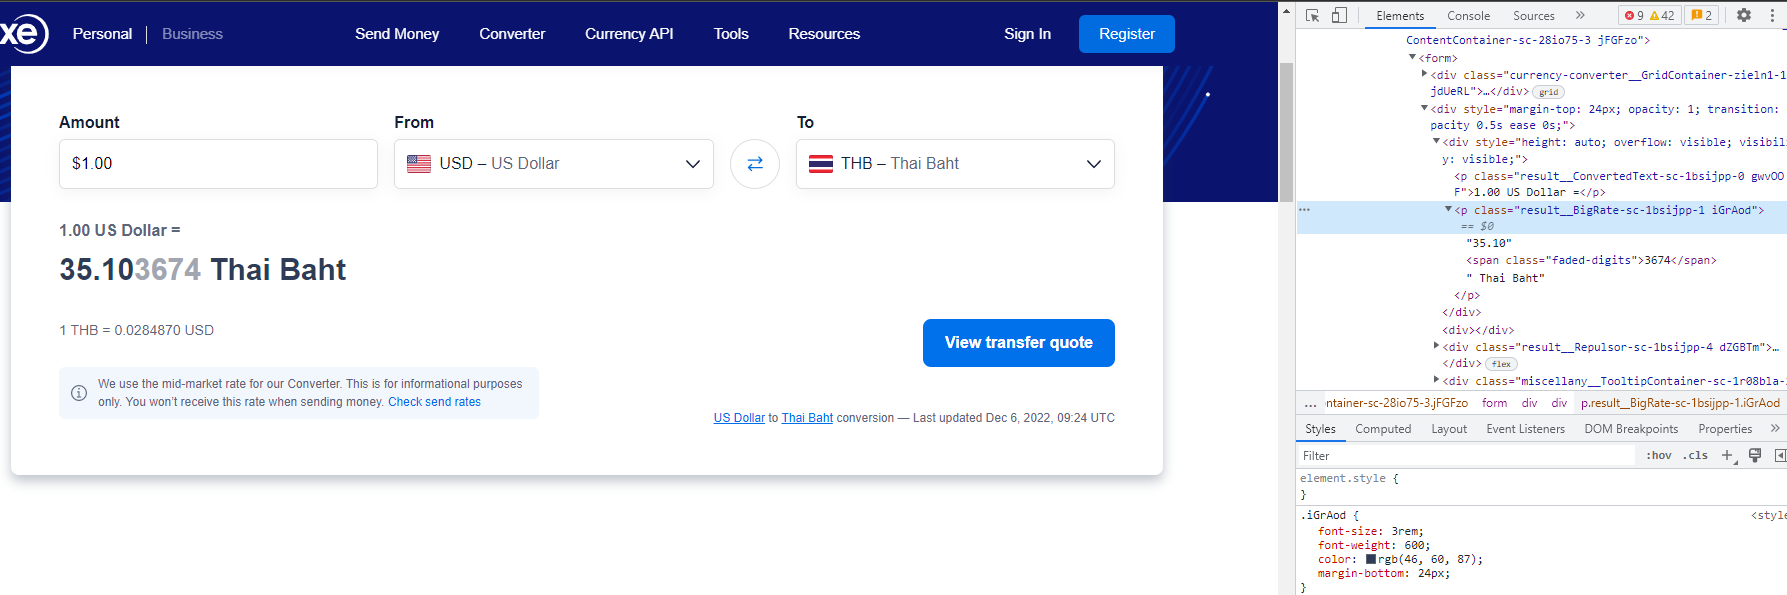

In [7]:
th_rate = exc_rate.find('p', {'class' : 'result__BigRate-sc-1bsijpp-1 iGrAod'}).strip() 
th_rate

'35.104183 Thai Baht'

In [8]:
thb_usd = round(float(th_rate.split()[0]),2)
unit = th_rate.split()[2]
currency = th_rate.split()[1]
print('the unit rate for 1 USD:', thb_usd, currency, unit)

the unit rate for 1 USD: 35.1 Thai Baht


In [ ]:
!apt-get update                                                                          # Update Package 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # install Java Development Kit (important!!! cant run Spark with out this)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # install Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip  Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # install Package Python for connect with Spark 

In [10]:
import sys

In [11]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [12]:
!pip install pyspark==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212.4 MB 64 kB/s 
     |████████████████████████████████| 198 kB 45.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=c5abe82a82df8bd0aeb18ee11a3bb4d998af97e2e98149f68fb4e5204b3b62d4
  Stored in directory: /root/.cache/pip/wheels/df/88/9e/58ef1f74892fef590330ca0830b5b6d995ba29b44f977b3926
Successfully built pyspark


In [14]:
# Create Spark Session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [15]:
data = [thb_usd]
currency_rate = ['THB_USD']
df_rate = spark.createDataFrame(data = [data], schema = currency_rate)
df_rate.show()

+-------+
|THB_USD|
+-------+
|   35.1|
+-------+

